# Herding and Preferential Attachment

<b> With equal Probability</b>

In [19]:
#With equal Probability 
import math
import random
import scipy
import pylab 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

# dictionary 
graph_dict = {}

# total no. of vertices
total_Nodes = 10000
edges = 0

for i in range(total_Nodes):
    graph_dict[i] = [] 
    
    #node selection, to whom to connect (with equal probability) 
    x = random.choice(list(graph_dict.keys()))
    graph_dict[x].append(i)

# calculation of degree distribution
degrees = [len(node) for node in graph_dict.values()]


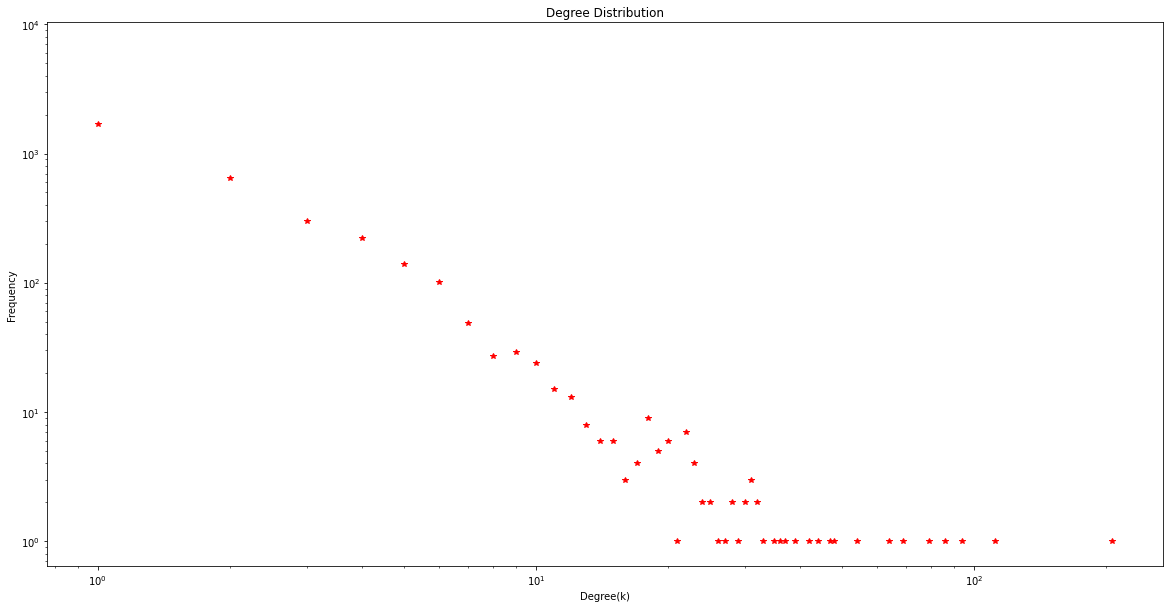

In [46]:
#plotting
import pandas as pd 
degree_DF= pd.DataFrame(degrees)
degree_DF.columns=['degree']
degree_freq_prob_e=degree_DF.groupby('degree').size().reset_index(name='size')

plt.figure(figsize=(20,10))
plt.loglog(degree_freq_prob_e['degree'],degree_freq_prob_e['size'],marker='*',ls='',c='red')
plt.ylabel('Frequency')
plt.xlabel('Degree(k)')
plt.title("Degree Distribution")
plt.show()

#calculating probability distribution 
degree_freq_prob_e['prob']=degree_freq_prob_e['size']/np.sum(degree_freq_prob_e['size'])
# degree_freq_prob_E

<b> With Probability p(i) proportional to degreee of the existing node k(i) </b>

In [47]:
#with Prefential attachment

# dictionary 
graph_dict = {}

# total number of vertices
total_Nodes = 10000 
edges = 0

for i in range(total_Nodes):
    graph_dict[i] = []      
    for node in graph_dict.values():
        
        #calculation of probability of the nodes with respect to their degrees
        connect_Probability = 1.0 / (edges + i + 1) * (len(node) + 1)
        if(random.random() <= connect_Probability):
            node.append(i)
            edges += 1

# degree distribution
degrees = [len(node) for node in graph_dict.values()]


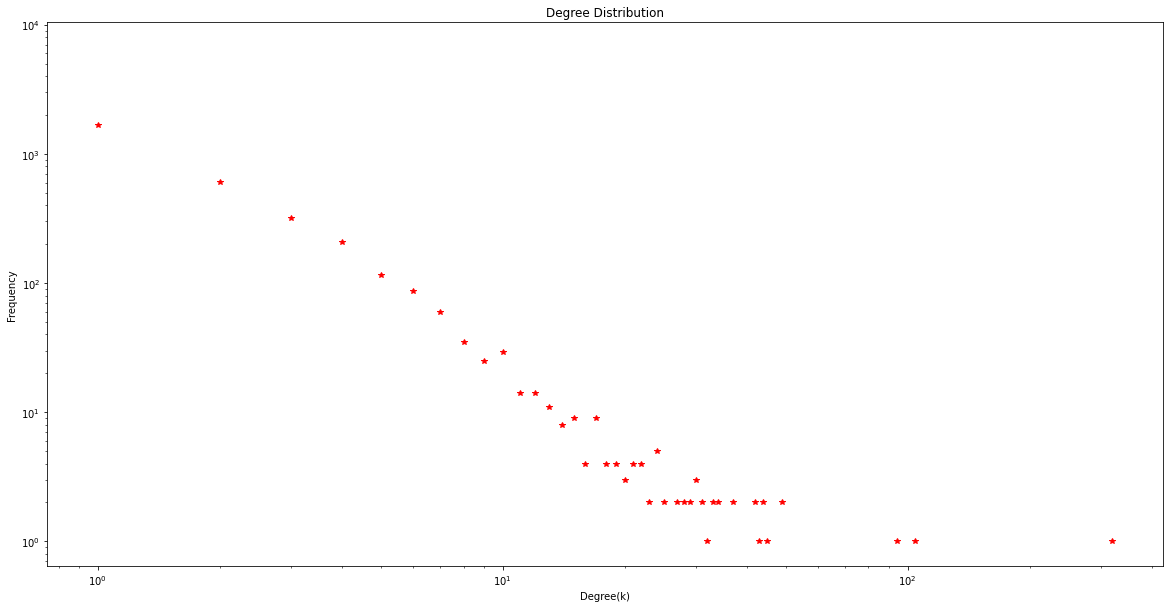

In [48]:
#plotting
import pandas as pd 
degree_DF= pd.DataFrame(degrees)
degree_DF.columns=['degree']
degree_freq_prob_p=degree_DF.groupby('degree').size().reset_index(name='size')

plt.figure(figsize=(20,10))
plt.loglog(degree_freq_prob_p['degree'],degree_freq_prob_p['size'],marker='*',ls='',c="red")
plt.ylabel('Frequency')
plt.xlabel('Degree(k)')
plt.title("Degree Distribution")
plt.show()

degree_freq_prob_p['prob']=degree_freq_prob_p['size']/np.sum(degree_freq_prob_p['size'])

<b> Write your own function to calculate the entropy of a (discrete) probability distribution (with base 2), 
and apply it to both degree distributions in the previous task.</b>

In [49]:
#function for entropy calculation
#dataframe and column 
def Entropy_Calc(df,column):
    entropy_calc=np.sum(df[column]*np.log2(1/df[column]))
    return entropy_calc

In [50]:
#entropy for equal probability 
entropy_calc_e= Entropy_Calc(degree_freq_prob_e,'prob')
print("Entropy for equal probability is:",entropy_calc_e)

Entropy for equal probability is: 1.7436078451914185


In [51]:
#entropy with prefential attachment 
entropy_calc_p=Entropy_Calc(degree_freq_prob_p,'prob')
print("Entropy for equal probability is:",entropy_calc_p)

Entropy for equal probability is: 1.7270823611275927


In [52]:
from scipy.stats import entropy
entropy(degree_freq_prob_p['prob'], base=2)

1.7270823611275927

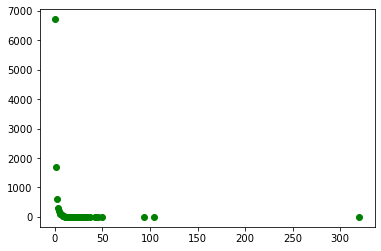

In [55]:
#plotting
plt.plot(degree_freq_prob_p['degree'],degree_freq_prob_p['size'],marker='o',ls='',c="green")